# Problem Statement
Q. Find publicly available data for key factors that influence US home prices nationally. Then,
build a data science model that explains how these factors impacted home prices over the last 20
years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices:
fred.stlouisfed.org/series/CSUSHPISA.

In [ ]:
#Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,mean_squared_error
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics




import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset
df = pd.read_csv("C:\\Home New\\prepared_dataset.csv").set_index("DATE")
df.head()

,Housing_price_index,YEAR,MONTH,Working_population,Unemployement,GDP_per_capita,Interest_rate,Construction_Price_Index,Income,New_Constructed_Units,...,Avg_sale_priceHS_northeast,Homeownership_rate,Consumer_goods_avg_price,Mortgage_percent,Vacant Houses Inventory,Occupied by owners,Emp_Population_ratio,Population,Total_Housing_inventory_2016,Median_Sales_price_Home
DATE,,,,,,,,,,,,,,,,,,,,,
2003-01-01,128.461,2003.0,1.0,130579,5.8,50462.000000,1.24,144.4,10710.4,1654.0,...,284400.000000,68.000000,182.6,5.9160,14908.000000,105884.000000,62.5,289412.0,NaN,186000.000000
2003-02-01,129.355,2003.0,2.0,130443,5.9,50573.333333,1.26,145.2,10674.0,1688.0,...,294666.666667,68.000000,183.6,5.8425,15020.000000,105919.000000,62.5,289606.0,NaN,187933.333333
2003-03-01,130.148,2003.0,3.0,130233,5.9,50684.666667,1.25,145.2,10696.5,1638.0,...,304933.333333,68.000000,183.9,5.7450,15132.000000,105954.000000,62.4,289809.0,NaN,189866.666667
2003-04-01,130.884,2003.0,4.0,130176,6.0,50796.000000,1.26,145.9,10752.7,1662.0,...,315200.000000,68.000000,183.2,5.8125,15244.000000,105989.000000,62.4,290024.0,NaN,191800.000000
2003-05-01,131.735,2003.0,5.0,130197,6.1,51034.666667,1.26,145.8,10832.0,1733.0,...,314600.000000,68.133333,182.9,5.4840,15367.333333,106015.333333,62.3,290250.0,NaN,191833.333333


In [195]:
#Finding the shape of dataset
df.shape

(251, 21)

In [ ]:
#We have 251 rows & 21 attributes.Our target label is Housing price index

In [4]:
df.isna().sum()

Housing_price_index               2
YEAR                              2
MONTH                             2
Working_population                0
Unemployement                     0
GDP_per_capita                    0
Interest_rate                     0
Construction_Price_Index          1
Income                            1
New_Constructed_Units             1
Avg_sale_priceHS_Midwest          0
Avg_sale_priceHS_northeast        0
Homeownership_rate                0
Consumer_goods_avg_price          1
Mortgage_percent                  0
Vacant Houses Inventory           0
Occupied by owners                0
Emp_Population_ratio              0
Population                        1
Total_Housing_inventory_2016    162
Median_Sales_price_Home           0
dtype: int64

In [5]:
#Dropping Total housing inventory for sale from 2016 becuse dataset is incomplete.
df.drop("Total_Housing_inventory_2016", axis=1, inplace=True)


In [6]:
#Dropping missing values from dataset 
df.dropna(inplace=True)


In [7]:
df.isna().sum()

Housing_price_index           0
YEAR                          0
MONTH                         0
Working_population            0
Unemployement                 0
GDP_per_capita                0
Interest_rate                 0
Construction_Price_Index      0
Income                        0
New_Constructed_Units         0
Avg_sale_priceHS_Midwest      0
Avg_sale_priceHS_northeast    0
Homeownership_rate            0
Consumer_goods_avg_price      0
Mortgage_percent              0
Vacant Houses Inventory       0
Occupied by owners            0
Emp_Population_ratio          0
Population                    0
Median_Sales_price_Home       0
dtype: int64

In [199]:
#No Null values are present in this dataset

In [115]:
#Finding info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2003-01-01 to 2023-11-01
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Housing_price_index         249 non-null    float64
 1   YEAR                        249 non-null    float64
 2   MONTH                       249 non-null    float64
 3   Working_population          251 non-null    int64  
 4   Unemployement               251 non-null    float64
 5   GDP_per_capita              251 non-null    float64
 6   Interest_rate               251 non-null    float64
 7   Construction_Price_Index    250 non-null    float64
 8   Income                      250 non-null    float64
 9   New_Constructed_Units       250 non-null    float64
 10  Avg_sale_priceHS_Midwest    251 non-null    float64
 11  Avg_sale_priceHS_northeast  251 non-null    float64
 12  Homeownership_rate          251 non-null    float64
 13  Consumer_goods_avg_price

In [ ]:
#No categorical column present in dataset.All are numerical columns.

In [8]:
#Seperating numerical & Categorical data

num_data=df.select_dtypes(include=[np.number])
cat_data=df.select_dtypes(exclude=[np.number])


print("Categorical columns \n",cat_data.columns)
print("\n Shape of Categorical columns \n", cat_data.shape)
print("\n Numerical columns \n",num_data.columns)
print("\n Shape of Numerical columns \n", num_data.shape)


Categorical columns 
 Index([], dtype='object')

 Shape of Categorical columns 
 (249, 0)

 Numerical columns 
 Index(['Housing_price_index', 'YEAR', 'MONTH', 'Working_population',
       'Unemployement', 'GDP_per_capita', 'Interest_rate',
       'Construction_Price_Index', 'Income', 'New_Constructed_Units',
       'Avg_sale_priceHS_Midwest', 'Avg_sale_priceHS_northeast',
       'Homeownership_rate', 'Consumer_goods_avg_price', 'Mortgage_percent',
       'Vacant Houses Inventory', 'Occupied by owners', 'Emp_Population_ratio',
       'Population', 'Median_Sales_price_Home'],
      dtype='object')

 Shape of Numerical columns 
 (249, 20)


In [9]:
#Now Describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Housing_price_index,249.0,185.081968,46.531700,128.461,148.278000,174.342000,202.9130,311.175
YEAR,249.0,2012.879518,6.002817,2003.000,2008.000000,2013.000000,2018.0000,2023.000
MONTH,249.0,6.445783,3.442803,1.000,3.000000,6.000000,9.0000,12.000
Working_population,249.0,139818.016064,7683.826531,129700.000,133153.000000,137847.000000,146172.0000,156738.000
Unemployement,249.0,5.924498,2.047836,3.400,4.400000,5.400000,7.2000,14.700
GDP_per_capita,249.0,57720.763052,4269.985891,50462.000,54493.000000,56033.333333,61174.0000,67083.000
Interest_rate,249.0,1.432490,1.692254,0.050,0.120000,0.650000,2.2000,5.330
Construction_Price_Index,249.0,217.200426,49.202006,144.400,186.900000,208.900000,233.3000,353.015
Income,249.0,13611.312851,1904.141908,10674.000,12137.100000,13053.100000,15184.7000,20422.600
New_Constructed_Units,249.0,1210.915663,419.087494,520.000,844.000000,1200.000000,1459.0000,2245.000


# EDA

In [35]:
#Univariate Analysis

In [10]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='y');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of Housing_price_index
----------------------------------------------------------------------------
count    249.000000
mean     185.081968
std       46.531700
min      128.461000
25%      148.278000
50%      174.342000
75%      202.913000
max      311.175000
Name: Housing_price_index, dtype: float64 Distribution of Housing_price_index
----------------------------------------------------------------------------


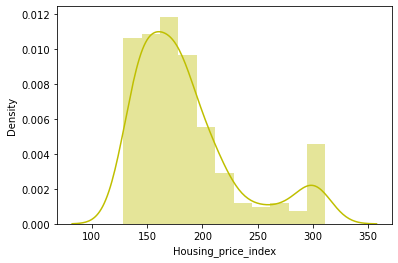

BoxPlot of Housing_price_index
----------------------------------------------------------------------------


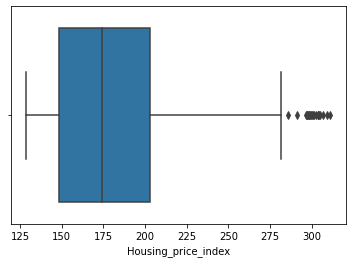

Description of YEAR
----------------------------------------------------------------------------
count     249.000000
mean     2012.879518
std         6.002817
min      2003.000000
25%      2008.000000
50%      2013.000000
75%      2018.000000
max      2023.000000
Name: YEAR, dtype: float64 Distribution of YEAR
----------------------------------------------------------------------------


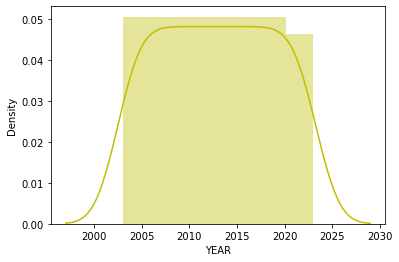

BoxPlot of YEAR
----------------------------------------------------------------------------


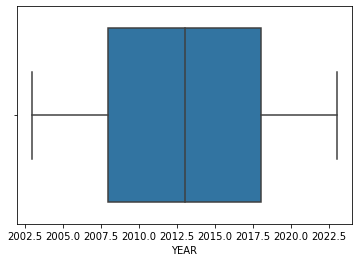

Description of MONTH
----------------------------------------------------------------------------
count    249.000000
mean       6.445783
std        3.442803
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: MONTH, dtype: float64 Distribution of MONTH
----------------------------------------------------------------------------


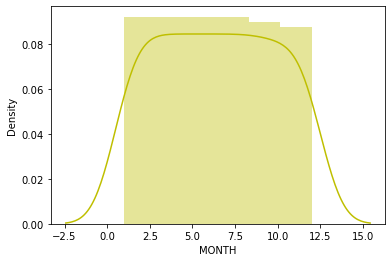

BoxPlot of MONTH
----------------------------------------------------------------------------


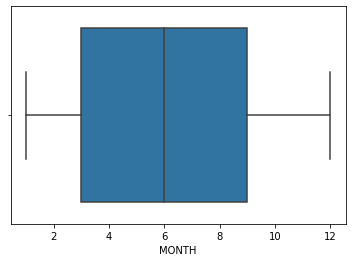

Description of Working_population
----------------------------------------------------------------------------
count       249.000000
mean     139818.016064
std        7683.826531
min      129700.000000
25%      133153.000000
50%      137847.000000
75%      146172.000000
max      156738.000000
Name: Working_population, dtype: float64 Distribution of Working_population
----------------------------------------------------------------------------


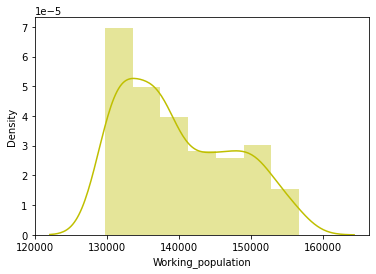

BoxPlot of Working_population
----------------------------------------------------------------------------


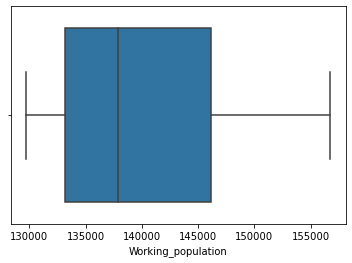

Description of Unemployement
----------------------------------------------------------------------------
count    249.000000
mean       5.924498
std        2.047836
min        3.400000
25%        4.400000
50%        5.400000
75%        7.200000
max       14.700000
Name: Unemployement, dtype: float64 Distribution of Unemployement
----------------------------------------------------------------------------


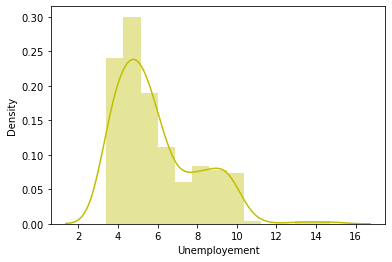

BoxPlot of Unemployement
----------------------------------------------------------------------------


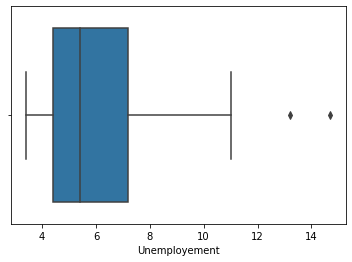

Description of GDP_per_capita
----------------------------------------------------------------------------
count      249.000000
mean     57720.763052
std       4269.985891
min      50462.000000
25%      54493.000000
50%      56033.333333
75%      61174.000000
max      67083.000000
Name: GDP_per_capita, dtype: float64 Distribution of GDP_per_capita
----------------------------------------------------------------------------


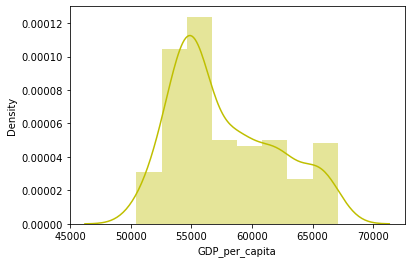

BoxPlot of GDP_per_capita
----------------------------------------------------------------------------


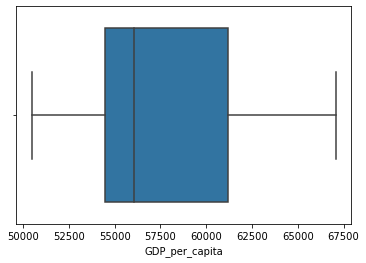

Description of Interest_rate
----------------------------------------------------------------------------
count    249.000000
mean       1.432490
std        1.692254
min        0.050000
25%        0.120000
50%        0.650000
75%        2.200000
max        5.330000
Name: Interest_rate, dtype: float64 Distribution of Interest_rate
----------------------------------------------------------------------------


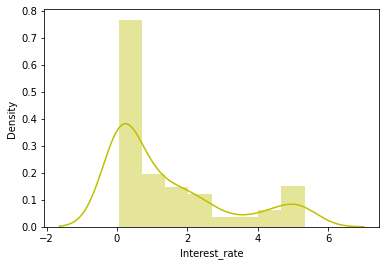

BoxPlot of Interest_rate
----------------------------------------------------------------------------


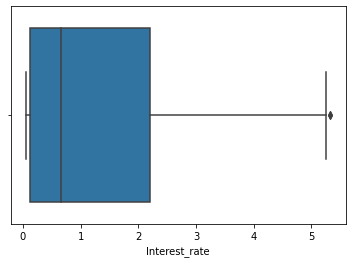

Description of Construction_Price_Index
----------------------------------------------------------------------------
count    249.000000
mean     217.200426
std       49.202006
min      144.400000
25%      186.900000
50%      208.900000
75%      233.300000
max      353.015000
Name: Construction_Price_Index, dtype: float64 Distribution of Construction_Price_Index
----------------------------------------------------------------------------


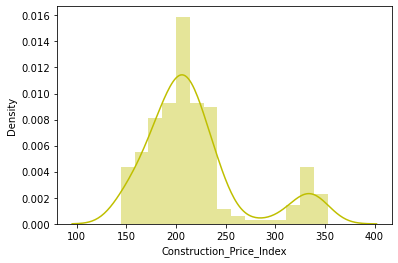

BoxPlot of Construction_Price_Index
----------------------------------------------------------------------------


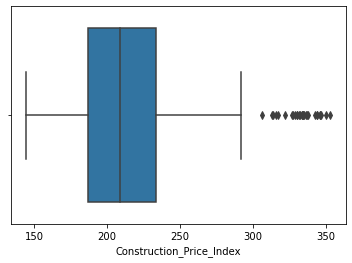

Description of Income
----------------------------------------------------------------------------
count      249.000000
mean     13611.312851
std       1904.141908
min      10674.000000
25%      12137.100000
50%      13053.100000
75%      15184.700000
max      20422.600000
Name: Income, dtype: float64 Distribution of Income
----------------------------------------------------------------------------


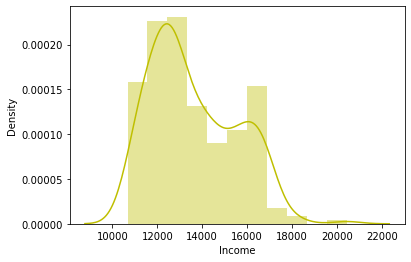

BoxPlot of Income
----------------------------------------------------------------------------


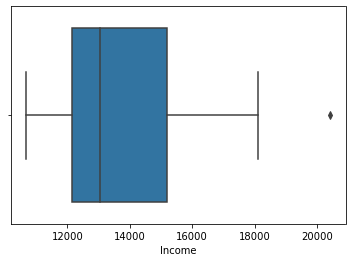

Description of New_Constructed_Units
----------------------------------------------------------------------------
count     249.000000
mean     1210.915663
std       419.087494
min       520.000000
25%       844.000000
50%      1200.000000
75%      1459.000000
max      2245.000000
Name: New_Constructed_Units, dtype: float64 Distribution of New_Constructed_Units
----------------------------------------------------------------------------


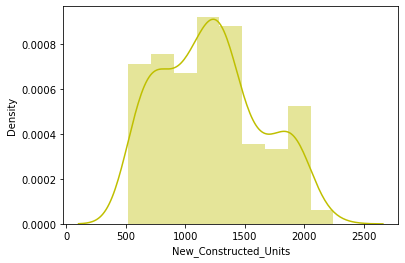

BoxPlot of New_Constructed_Units
----------------------------------------------------------------------------


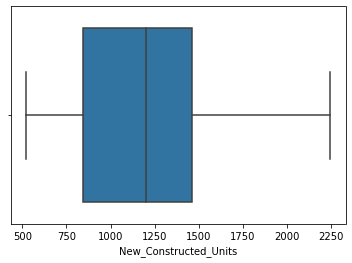

Description of Avg_sale_priceHS_Midwest
----------------------------------------------------------------------------
count       249.000000
mean     295186.746988
std       62884.215146
min      206500.000000
25%      240166.666667
50%      294966.666667
75%      326800.000000
max      449300.000000
Name: Avg_sale_priceHS_Midwest, dtype: float64 Distribution of Avg_sale_priceHS_Midwest
----------------------------------------------------------------------------


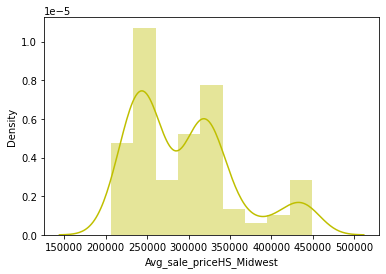

BoxPlot of Avg_sale_priceHS_Midwest
----------------------------------------------------------------------------


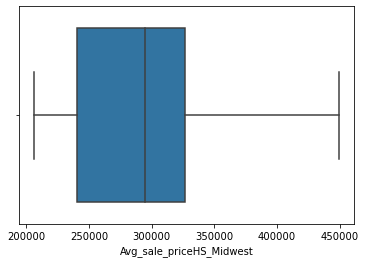

Description of Avg_sale_priceHS_northeast
----------------------------------------------------------------------------
count    2.490000e+02
mean     5.246060e+05
std      1.525934e+05
min      2.844000e+05
25%      4.124667e+05
50%      4.800667e+05
75%      6.094000e+05
max      1.037100e+06
Name: Avg_sale_priceHS_northeast, dtype: float64 Distribution of Avg_sale_priceHS_northeast
----------------------------------------------------------------------------


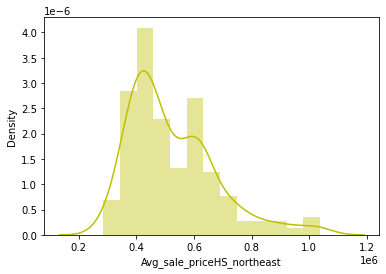

BoxPlot of Avg_sale_priceHS_northeast
----------------------------------------------------------------------------


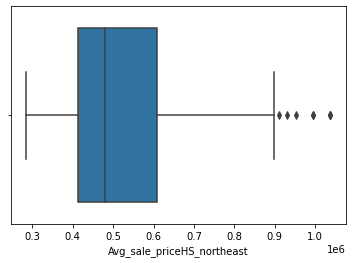

Description of Homeownership_rate
----------------------------------------------------------------------------
count    249.000000
mean      66.184739
std        1.796130
min       62.900000
25%       64.733333
50%       65.933333
75%       67.900000
max       69.200000
Name: Homeownership_rate, dtype: float64 Distribution of Homeownership_rate
----------------------------------------------------------------------------


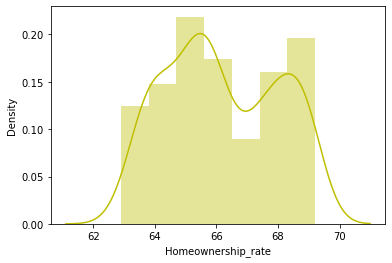

BoxPlot of Homeownership_rate
----------------------------------------------------------------------------


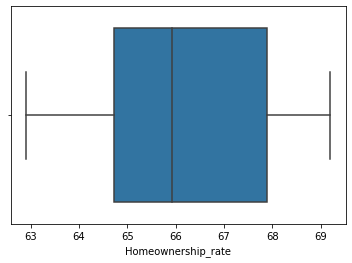

Description of Consumer_goods_avg_price
----------------------------------------------------------------------------
count    249.000000
mean     232.681486
std       30.279598
min      182.600000
25%      212.174000
50%      232.445000
75%      251.214000
max      307.481000
Name: Consumer_goods_avg_price, dtype: float64 Distribution of Consumer_goods_avg_price
----------------------------------------------------------------------------


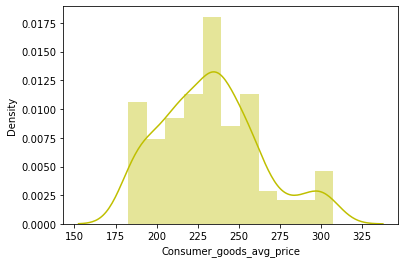

BoxPlot of Consumer_goods_avg_price
----------------------------------------------------------------------------


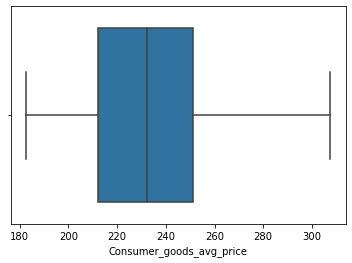

Description of Mortgage_percent
----------------------------------------------------------------------------
count    249.000000
mean       4.753661
std        1.151192
min        2.684000
25%        3.840000
50%        4.510000
75%        5.842500
max        7.200000
Name: Mortgage_percent, dtype: float64 Distribution of Mortgage_percent
----------------------------------------------------------------------------


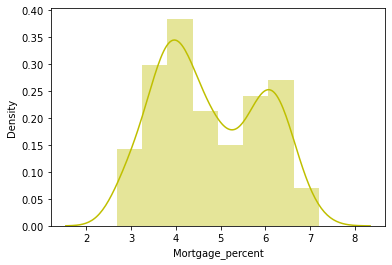

BoxPlot of Mortgage_percent
----------------------------------------------------------------------------


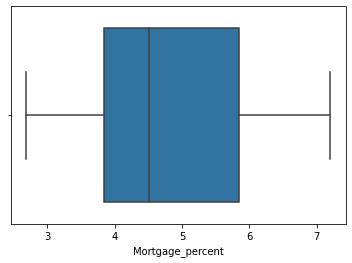

Description of Vacant Houses Inventory
----------------------------------------------------------------------------
count      249.000000
mean     17052.277108
std       1379.860846
min      13876.000000
25%      15797.000000
50%      17232.000000
75%      18263.000000
max      19137.000000
Name: Vacant Houses Inventory, dtype: float64 Distribution of Vacant Houses Inventory
----------------------------------------------------------------------------


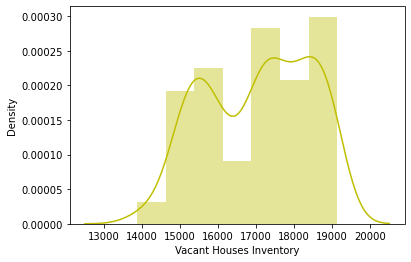

BoxPlot of Vacant Houses Inventory
----------------------------------------------------------------------------


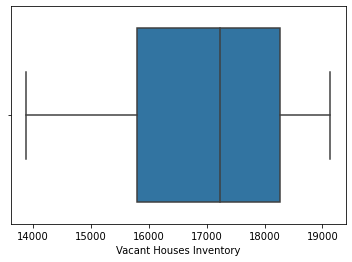

Description of Occupied by owners
----------------------------------------------------------------------------
count       249.000000
mean     116778.208835
std        6721.276863
min      105884.000000
25%      111601.000000
50%      115301.000000
75%      121267.000000
max      130386.000000
Name: Occupied by owners, dtype: float64 Distribution of Occupied by owners
----------------------------------------------------------------------------


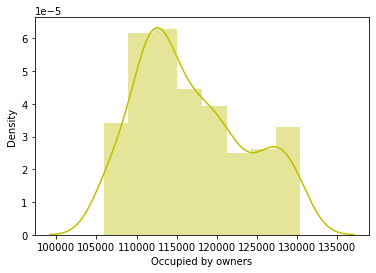

BoxPlot of Occupied by owners
----------------------------------------------------------------------------


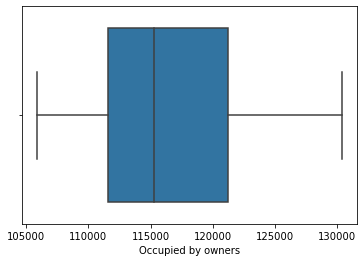

Description of Emp_Population_ratio
----------------------------------------------------------------------------
count    249.000000
mean      60.178313
std        1.911049
min       51.300000
25%       58.700000
50%       60.000000
75%       62.200000
max       63.400000
Name: Emp_Population_ratio, dtype: float64 Distribution of Emp_Population_ratio
----------------------------------------------------------------------------


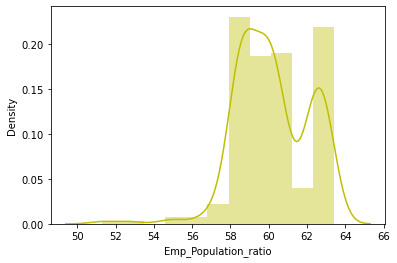

BoxPlot of Emp_Population_ratio
----------------------------------------------------------------------------


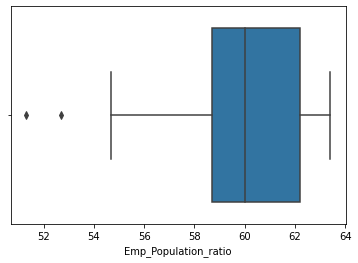

Description of Population
----------------------------------------------------------------------------
count       249.000000
mean     315549.405622
std       13989.070742
min      289412.000000
25%      303707.000000
50%      316729.000000
75%      328863.000000
max      335675.000000
Name: Population, dtype: float64 Distribution of Population
----------------------------------------------------------------------------


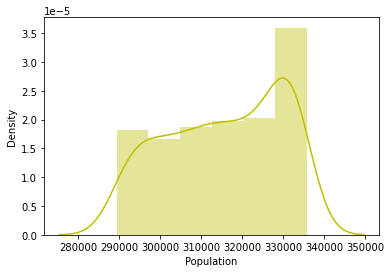

BoxPlot of Population
----------------------------------------------------------------------------


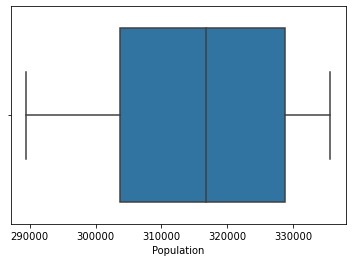

Description of Median_Sales_price_Home
----------------------------------------------------------------------------
count       249.000000
mean     285456.224900
std       70563.891064
min      186000.000000
25%      228800.000000
50%      265900.000000
75%      321300.000000
max      479500.000000
Name: Median_Sales_price_Home, dtype: float64 Distribution of Median_Sales_price_Home
----------------------------------------------------------------------------


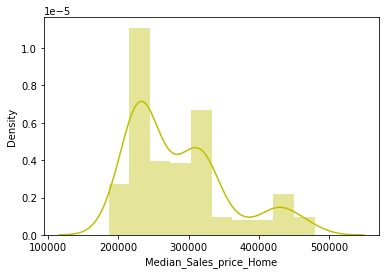

BoxPlot of Median_Sales_price_Home
----------------------------------------------------------------------------


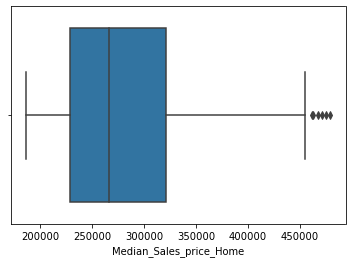

In [11]:
for x in df:
    univariateAnalysis_numeric(x,21)

<AxesSubplot:xlabel='YEAR', ylabel='Housing_price_index'>

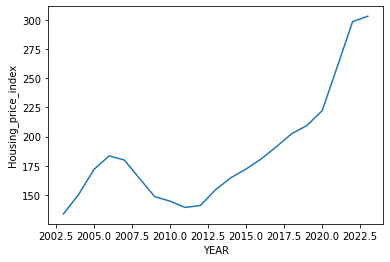

In [12]:
# Visualising Housing price index over year
sns.lineplot(x="YEAR", y="Housing_price_index",data=df, ci=None)

In [201]:
# Housing price index increased year over year.From 2006 till 2012 there is down fall in housing price but after 2012 it is gradually increased.

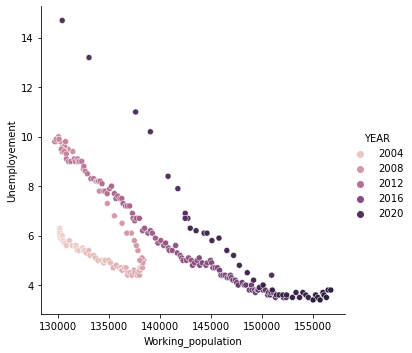

In [13]:
#Visualising working population Vs Unemployed with r.to year

sns.relplot(x="Working_population", y="Unemployement",hue="YEAR",data=df, ci=None)

In [ ]:
#from 2003 to 2012 the unemployement ratio is between 4 to 10 percent. But after 2016 it is descred below 4%.

<AxesSubplot:xlabel='Working_population', ylabel='GDP_per_capita'>

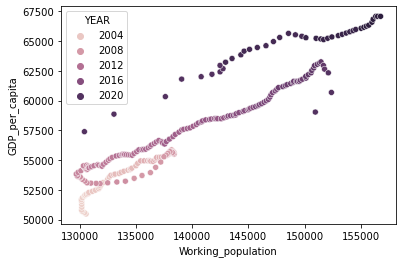

In [14]:
#Working population Vs  GDP per capita
sns.scatterplot(x="Working_population", y="GDP_per_capita",hue="YEAR",data=df, ci=None)

In [ ]:
# In 2003 the GDP per capita is lower according to population. It is lower till 2008n but after 2008 it is gradually increased.
#As working population increases the GDP per capita is also incread.

<AxesSubplot:xlabel='YEAR', ylabel='GDP_per_capita'>

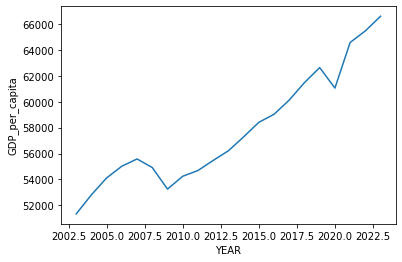

In [15]:
#Yearwise GDP per CAPITA
sns.lineplot(x="YEAR", y="GDP_per_capita",data=df, ci=None)

In [ ]:
#The GDP is continuousely increasing phase except 2006 to 1009 its may be due to global recession. & from 2019 to 2021 due to COVID.
#But overall the GDP is growing.

<AxesSubplot:xlabel='Housing_price_index', ylabel='Interest_rate'>

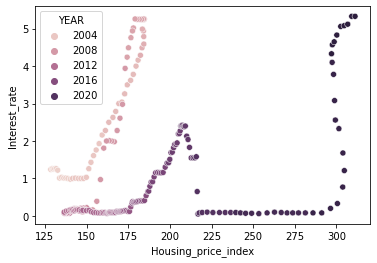

In [202]:
#Visualising housing price index VS Interest rate
sns.scatterplot(x="Housing_price_index", y="Interest_rate", hue="YEAR", data=df, ci=None)

In [ ]:
#In 2003 to 2008 the interest rate is between 1 to 5%. After 2008 it has been reduced from 0.25% ti 2% max.

<AxesSubplot:xlabel='Population', ylabel='Working_population'>

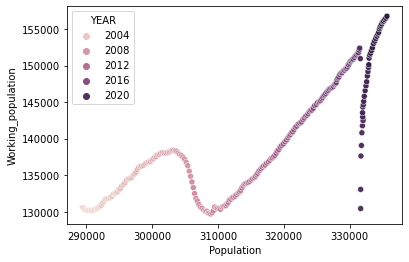

In [92]:
#Visualising population VS working population

sns.scatterplot(x="Population", y="Working_population",hue="YEAR",data=df, ci=None)

In [203]:
#In 2003 very lessno. of peoples are working. The graph is then increasing over & over. From 2006 to 2009 workinhg population is decreaed may be due to recession. But after that is is continousely increasing in  nature.
#In 2019 to 2021 working people are slitely decreased due to covid.

<AxesSubplot:xlabel='Vacant Houses Inventory', ylabel='Occupied by owners'>

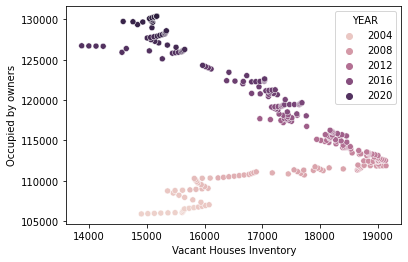

In [93]:
#Visualising vacant housing inventory Vs occupied by owners.

sns.scatterplot(x="Vacant Houses Inventory", y="Occupied by owners",hue="YEAR",data=df, ci=None) 

In [ ]:
#From 2003 vacant house increased but occupied by owners are less till 2008 but after 2008 till 2023 the owners are increased gradually.

<AxesSubplot:xlabel='Housing_price_index', ylabel='Homeownership_rate'>

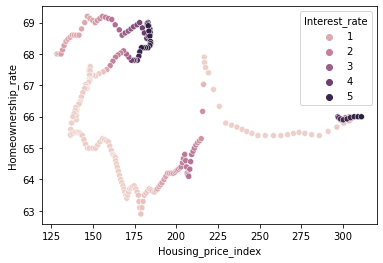

In [186]:
#Visualising housing price index Vs Homeownership rate with respect to interest rate

sns.scatterplot(x="Housing_price_index", y="Homeownership_rate",hue="Interest_rate",data=df, ci=None) 

In [204]:
#Lower the interest rate higher the homeownership rate with respect to lower housing price index.
#The peoples purchased more houses if the Housing price, inyterest rate is lower.The lower interest ownership rate up to 69% .
#But as soon as the Price increased the the home ownership rate is also down till 65%.

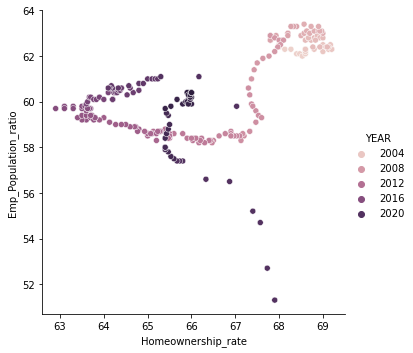

In [189]:
#Visualising homeownership rate Vs Employed population ratio.
sns.relplot(x="Homeownership_rate", y="Emp_Population_ratio",hue="YEAR",data=df, ci=None) 

In [ ]:
# Home ownership rate & employed population ratio are correlated.

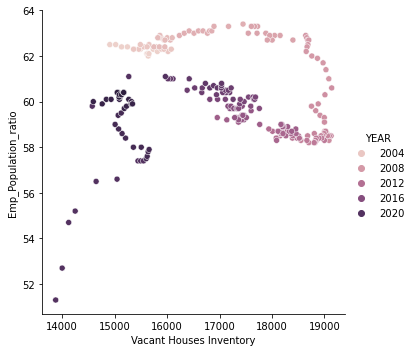

In [190]:
#Visualising vacant houses inventory Vs Emp population ratio

sns.relplot(x="Vacant Houses Inventory", y="Emp_Population_ratio",hue="YEAR",data=df, ci=None) 

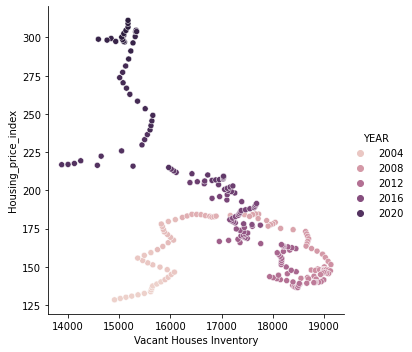

In [205]:
#Visualising vacant houses inventory Vs Housing_price_index

sns.relplot(x="Vacant Houses Inventory", y="Housing_price_index",hue="YEAR",data=df, ci=None) 

In [206]:
#Housing_price_index lower with respect to more no. of vacanct houses.

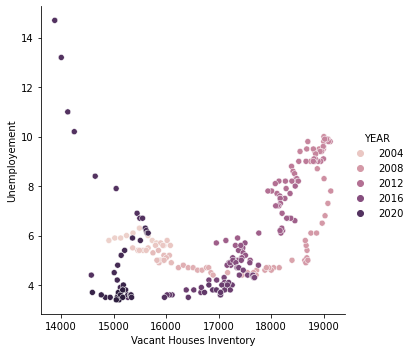

In [191]:
#Visalising vancant houses Vs Unemployement

sns.relplot(x="Vacant Houses Inventory", y="Unemployement",hue="YEAR",data=df, ci=None) 

<AxesSubplot:xlabel='GDP_per_capita', ylabel='Homeownership_rate'>

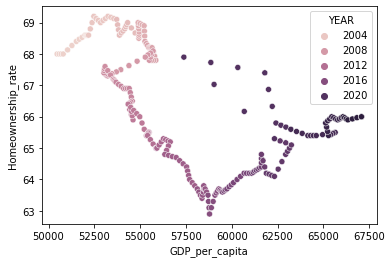

In [98]:
#Visualising GDP per capita Vs Homeownership rate 

sns.scatterplot(x="GDP_per_capita", y="Homeownership_rate",hue="YEAR",data=df, ci=None) 

In [207]:
#In 2003 till 2008 home ownership rate is much higher up to 69%. But after 2006 GDP goes down till 2010 & homeownership rate is aslo goes down.
#But after 2012 the GDP is increased & homeownership rate stagenent between 65 to 66%.

<AxesSubplot:xlabel='Median_Sales_price_Home', ylabel='Homeownership_rate'>

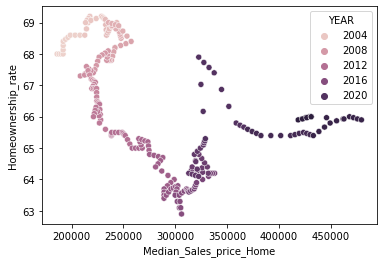

In [100]:
#Visulasing median sales price Vs Homeownership rate
sns.scatterplot(x="Median_Sales_price_Home", y="Homeownership_rate",hue="YEAR",data=df, ci=None) 

In [ ]:
#Lower the home sales price higher the ownership rate.

<AxesSubplot:xlabel='Income', ylabel='Homeownership_rate'>

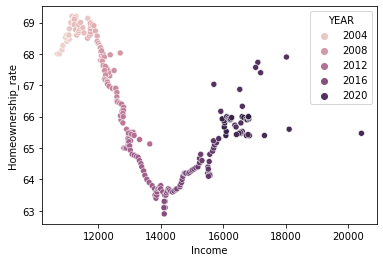

In [101]:
#Income Vs Homeownership
sns.scatterplot(x="Income", y="Homeownership_rate",hue="YEAR",data=df, ci=None) 

In [ ]:
#Lower the income lower the home ownership rate

<AxesSubplot:xlabel='Housing_price_index', ylabel='Homeownership_rate'>

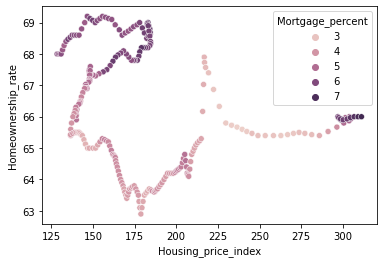

In [102]:
#Housing_price_index Vs Homeownership_rate w.r. to Mortgage_percent

sns.scatterplot(x="Housing_price_index", y="Homeownership_rate",hue="Mortgage_percent",data=df, ci=None) 

In [ ]:
# For higher the mortage rate and house price index stagannt the homeownership rate

<AxesSubplot:xlabel='Housing_price_index', ylabel='Homeownership_rate'>

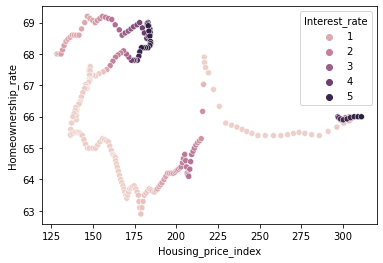

In [103]:
sns.scatterplot(x="Housing_price_index", y="Homeownership_rate",hue="Interest_rate",data=df, ci=None) 

In [ ]:
# For higher the interest rate and house price index stagannt the homeownership rate

<AxesSubplot:xlabel='Housing_price_index', ylabel='Median_Sales_price_Home'>

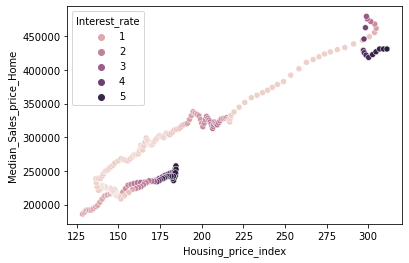

In [104]:
sns.scatterplot(x="Housing_price_index", y="Median_Sales_price_Home",hue="Interest_rate",data=df, ci=None) 

<AxesSubplot:xlabel='Housing_price_index', ylabel='Construction_Price_Index'>

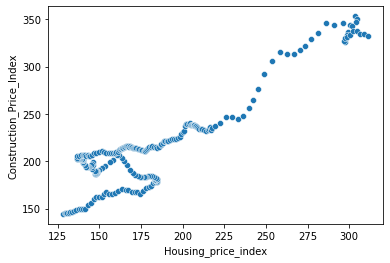

In [106]:
sns.scatterplot(x="Housing_price_index", y="Construction_Price_Index",data=df, ci=None) 

<AxesSubplot:xlabel='Housing_price_index', ylabel='Unemployement'>

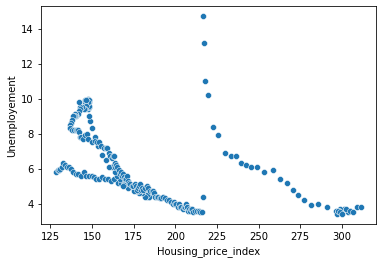

In [107]:
sns.scatterplot(x="Housing_price_index", y="Unemployement",data=df, ci=None)     

In [ ]:
#Finding correlation between features

In [16]:
df.corr()

,Housing_price_index,YEAR,MONTH,Working_population,Unemployement,GDP_per_capita,Interest_rate,Construction_Price_Index,Income,New_Constructed_Units,Avg_sale_priceHS_Midwest,Avg_sale_priceHS_northeast,Homeownership_rate,Consumer_goods_avg_price,Mortgage_percent,Vacant Houses Inventory,Occupied by owners,Emp_Population_ratio,Population,Median_Sales_price_Home
Housing_price_index,1.000000,0.770408,0.012056,0.849341,-0.537966,0.911946,0.305353,0.913022,0.807621,0.287749,0.918139,0.912337,-0.221349,0.846498,-0.023556,-0.638271,0.866179,-0.095855,0.701422,0.944415
YEAR,0.770408,1.000000,-0.026657,0.844521,-0.263387,0.938264,-0.183679,0.885990,0.963072,-0.269734,0.902365,0.869097,-0.722937,0.970836,-0.542614,-0.305655,0.980421,-0.559917,0.992025,0.902322
MONTH,0.012056,-0.026657,1.000000,0.016406,-0.006073,0.035099,0.004487,0.006843,0.001216,-0.017877,0.026164,0.052409,0.006039,0.020985,-0.002925,-0.023823,0.028904,-0.015685,0.025706,0.029289
Working_population,0.849341,0.844521,0.016406,1.000000,-0.717747,0.937588,0.231481,0.811194,0.813551,0.113988,0.881945,0.882893,-0.562188,0.854740,-0.182979,-0.434809,0.863937,-0.038268,0.819897,0.888976
Unemployement,-0.537966,-0.263387,-0.006073,-0.717747,1.000000,-0.508854,-0.546885,-0.334959,-0.251127,-0.569155,-0.471575,-0.468024,0.170122,-0.293665,-0.239909,0.444748,-0.307544,-0.613875,-0.227198,-0.484380
GDP_per_capita,0.911946,0.938264,0.035099,0.937588,-0.508854,1.000000,0.084692,0.923588,0.934497,0.015666,0.956082,0.934756,-0.562350,0.948985,-0.329672,-0.473779,0.966924,-0.291785,0.907001,0.967768
Interest_rate,0.305353,-0.183679,0.004487,0.231481,-0.546885,0.084692,1.000000,0.003079,-0.121630,0.668693,0.048181,0.144657,0.457818,-0.067864,0.745720,-0.255967,-0.066426,0.703185,-0.233245,0.059833
Construction_Price_Index,0.913022,0.885990,0.006843,0.811194,-0.334959,0.923588,0.003079,1.000000,0.865056,-0.085623,0.936979,0.918319,-0.450379,0.955746,-0.244292,-0.413034,0.929256,-0.368898,0.838385,0.950661
Income,0.807621,0.963072,0.001216,0.813551,-0.251127,0.934497,-0.121630,0.865056,1.000000,-0.133832,0.885043,0.857300,-0.589022,0.930790,-0.510583,-0.428778,0.973722,-0.532526,0.943481,0.895536
New_Constructed_Units,0.287749,-0.269734,-0.017877,0.113988,-0.569155,0.015666,0.668693,-0.085623,-0.133832,1.000000,0.043390,0.036646,0.569782,-0.221791,0.543930,-0.684618,-0.132731,0.693453,-0.345130,0.073222


In [17]:
# Dropping multicollinearity columns
mult_cols = ["Median_Sales_price_Home", "Avg_sale_priceHS_Midwest","Avg_sale_priceHS_northeast",
            "YEAR", "MONTH",]
df.drop(columns = mult_cols, inplace = True)

In [18]:
df.corr()

,Housing_price_index,Working_population,Unemployement,GDP_per_capita,Interest_rate,Construction_Price_Index,Income,New_Constructed_Units,Homeownership_rate,Consumer_goods_avg_price,Mortgage_percent,Vacant Houses Inventory,Occupied by owners,Emp_Population_ratio,Population
Housing_price_index,1.000000,0.849341,-0.537966,0.911946,0.305353,0.913022,0.807621,0.287749,-0.221349,0.846498,-0.023556,-0.638271,0.866179,-0.095855,0.701422
Working_population,0.849341,1.000000,-0.717747,0.937588,0.231481,0.811194,0.813551,0.113988,-0.562188,0.854740,-0.182979,-0.434809,0.863937,-0.038268,0.819897
Unemployement,-0.537966,-0.717747,1.000000,-0.508854,-0.546885,-0.334959,-0.251127,-0.569155,0.170122,-0.293665,-0.239909,0.444748,-0.307544,-0.613875,-0.227198
GDP_per_capita,0.911946,0.937588,-0.508854,1.000000,0.084692,0.923588,0.934497,0.015666,-0.562350,0.948985,-0.329672,-0.473779,0.966924,-0.291785,0.907001
Interest_rate,0.305353,0.231481,-0.546885,0.084692,1.000000,0.003079,-0.121630,0.668693,0.457818,-0.067864,0.745720,-0.255967,-0.066426,0.703185,-0.233245
Construction_Price_Index,0.913022,0.811194,-0.334959,0.923588,0.003079,1.000000,0.865056,-0.085623,-0.450379,0.955746,-0.244292,-0.413034,0.929256,-0.368898,0.838385
Income,0.807621,0.813551,-0.251127,0.934497,-0.121630,0.865056,1.000000,-0.133832,-0.589022,0.930790,-0.510583,-0.428778,0.973722,-0.532526,0.943481
New_Constructed_Units,0.287749,0.113988,-0.569155,0.015666,0.668693,-0.085623,-0.133832,1.000000,0.569782,-0.221791,0.543930,-0.684618,-0.132731,0.693453,-0.345130
Homeownership_rate,-0.221349,-0.562188,0.170122,-0.562350,0.457818,-0.450379,-0.589022,0.569782,1.000000,-0.618051,0.700842,-0.160708,-0.590423,0.519973,-0.780595
Consumer_goods_avg_price,0.846498,0.854740,-0.293665,0.948985,-0.067864,0.955746,0.930790,-0.221791,-0.618051,1.000000,-0.377093,-0.331012,0.979608,-0.484584,0.947525


In [19]:
# Dropping multicollinearity columns
mult_cols = ["Consumer_goods_avg_price"]
df.drop(columns = mult_cols, inplace = True)

In [ ]:
#Remaining multicolinearity columns required for model prediction.

In [20]:
x=df.drop("Housing_price_index", axis=1)
y=df["Housing_price_index"]

In [21]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

# Initialising model for prediction Linear Regression

In [23]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
#Checking training score

lr.score(x_train, y_train)

0.9930823001358142

In [25]:
#Checking testing score

lr.score(x_test, y_test)

0.9947948660662697

In [26]:
#plot to  visualize data
y_pred=lr.predict(x_test)
y_pred

array([166.72954808, 308.71644813, 223.88891613, 181.19570754,
       139.15442038, 264.77412933, 174.20201554, 296.9137533 ,
       196.17354911, 131.15993088, 306.5515814 , 206.41690579,
       146.32873814, 198.18795846, 155.67931942, 145.69024539,
       203.81664818, 177.75491697, 168.68668143, 149.0629047 ,
       266.51820484, 177.59623022, 139.40752842, 200.572904  ,
       147.46420271, 144.24047821, 310.73637086, 306.69357998,
       191.47144129, 261.25587865, 271.42747955, 188.84130437,
       167.87634174, 210.31174494, 177.71465678, 281.00252687,
       187.44628258, 173.38908577, 156.00216703, 306.02949569,
       217.22385844, 159.59314328, 141.38609336, 143.18415678,
       177.43628411, 143.40395859, 179.3910711 , 139.53312474,
       172.09234549, 127.78693337, 279.56805729, 142.05394418,
       144.61399339, 173.69133941, 182.9846534 , 147.83648225,
       145.67549095, 174.74239129, 153.95886233, 159.30381583,
       199.50881717, 174.84750117, 186.93370128])

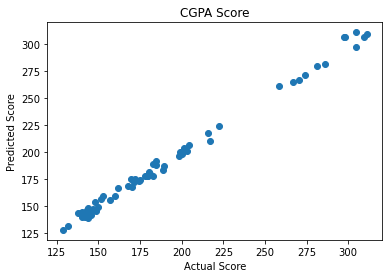

In [27]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("CGPA Score")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
y_pred= lr.predict(x_test)

In [31]:
#Mean square error
mean_absolute_error(y_test, y_pred)

3.102069006220477

In [32]:
#MSE
mean_absolute_error(y_test, y_pred)

3.102069006220477

In [33]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

3.78880076749888

In [34]:
r2_score(y_test, y_pred)

0.9947948660662697

In [35]:
conclusion=pd.DataFrame([lr.predict(x_test)[:],(y_test)[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
Predicted,166.729548,308.716448,223.888916,181.195708,139.15442,264.774129,174.202016,296.913753,196.173549,131.159931,...,173.691339,182.984653,147.836482,145.675491,174.742391,153.958862,159.303816,199.508817,174.847501,186.933701
Original,161.987000,311.175000,222.391000,180.082000,143.91600,266.845000,175.147000,304.724000,198.315000,131.735000,...,170.881000,188.725000,143.600000,144.585000,169.351000,148.186000,160.074000,199.232000,172.130000,189.617000


In [ ]:
#Linear Regression model is predicted very well

# Random Forest

In [226]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [227]:
y_pred

array([161.40765, 303.12375, 211.45895, 180.28005, 143.2982 , 263.3895 ,
       177.5581 , 302.52575, 197.1999 , 132.1759 , 300.0897 , 204.3665 ,
       142.3095 , 201.07905, 157.9473 , 148.0284 , 201.97755, 182.74685,
       165.77385, 149.27805, 270.12565, 175.0616 , 142.4992 , 203.79485,
       150.2458 , 149.955  , 302.01695, 299.41765, 183.21285, 254.85565,
       280.9623 , 182.872  , 171.5091 , 199.5511 , 179.37855, 289.24175,
       183.3599 , 176.4267 , 151.26485, 302.72455, 214.65365, 151.80815,
       141.9482 , 140.12705, 175.0391 , 138.99975, 177.07115, 140.7773 ,
       173.53695, 130.48685, 287.47255, 145.74365, 140.21335, 169.7127 ,
       189.26455, 148.602  , 148.2109 , 174.21095, 148.25365, 160.93545,
       200.15055, 170.6639 , 190.7873 ])

In [228]:
#Training accuracy score

regressor.score(x_train, y_train)

0.9985964388333235

In [229]:
#Testing accuracy score
regressor.score(x_test, y_test)

0.9950685926021041

In [230]:
#Mean square error
mean_absolute_error(y_test, y_pred)

2.258388095238095

In [231]:
#MSE
mean_absolute_error(y_test, y_pred)


2.258388095238095

In [232]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

3.6878330781990054

In [233]:
#R2 Score
r2_score(y_test, y_pred)

0.9950685926021041

In [234]:
conclusion=pd.DataFrame([regressor.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
Predicted,161.40765,303.12375,211.45895,180.28005,143.2982,263.3895,177.5581,302.52575,197.1999,132.1759,...,169.7127,189.26455,148.602,148.2109,174.21095,148.25365,160.93545,200.15055,170.6639,190.7873
Original,161.98700,311.17500,222.39100,180.08200,143.9160,266.8450,175.1470,304.72400,198.3150,131.7350,...,170.8810,188.72500,143.600,144.5850,169.35100,148.18600,160.07400,199.23200,172.1300,189.6170


In [ ]:
#Random forest is also very good model.

# Final Model Saving & Prediction

In [36]:
#Saving the model in local file system 
import pickle

pickle.dump(lr, open("regressor", "wb"))


In [37]:
loaded_model=pickle.load(open("regressor", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

99.47948660662696


In [38]:
conclusion=pd.DataFrame([lr.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
Predicted,166.729548,308.716448,223.888916,181.195708,139.15442,264.774129,174.202016,296.913753,196.173549,131.159931,...,173.691339,182.984653,147.836482,145.675491,174.742391,153.958862,159.303816,199.508817,174.847501,186.933701
Original,161.987000,311.175000,222.391000,180.082000,143.91600,266.845000,175.147000,304.724000,198.315000,131.735000,...,170.881000,188.725000,143.600000,144.585000,169.351000,148.186000,160.074000,199.232000,172.130000,189.617000
